# Chapter 9

## 9.3. Python libraries for image analysis

### 9.3.3. SimpleITK in biomedical image processing

Basic image segmentation using thresholding

Intensity range: 0.00784313725490196 to 1.0
Using threshold values: 0.25588235294117645 to 0.7519607843137255


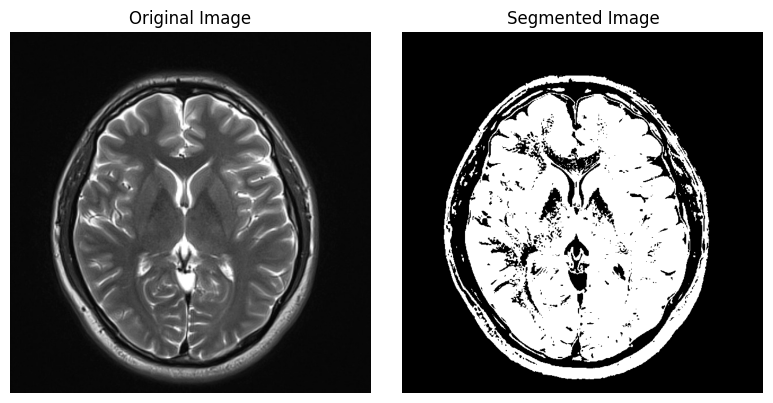

In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

# Load a grayscale PNG image using skimage
png_image = io.imread('example_data/Tr-no_0015.jpg', as_gray=True)

# Convert the 2D PNG image to a SimpleITK image
image = sitk.GetImageFromArray(png_image)

# Inspect the intensity range of the image
image_array = sitk.GetArrayViewFromImage(image)
min_intensity = np.min(image_array)
max_intensity = np.max(image_array)
print(f"Intensity range: {min_intensity} to {max_intensity}")

# Set threshold values based on the intensity range
# You should adjust these based on the intensity range
lower_threshold = min_intensity + (max_intensity - min_intensity) * 0.25
upper_threshold = max_intensity - (max_intensity - min_intensity) * 0.25
print(f"Using threshold values: {lower_threshold} to {upper_threshold}")

# Apply a threshold to segment the image
segmented_image = sitk.BinaryThreshold(image, lowerThreshold=lower_threshold, upperThreshold=upper_threshold, insideValue=1, outsideValue=0)

# Convert both images back to NumPy arrays for visualization
original_slice = sitk.GetArrayViewFromImage(image)
segmented_slice = sitk.GetArrayViewFromImage(segmented_image)

# Create a figure to display both the original and segmented images
plt.figure(figsize=(8, 4))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(original_slice, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_slice, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

# Show the figure
plt.tight_layout()
plt.show()
